In [1]:
import rasterio
from pathlib import Path
import matplotlib.pyplot as plt
from dem_stitcher.rio_tools import reproject_arr_to_match_profile
from rasterio.plot import show
import numpy as np

Will have to install ARIA-Tools [here](https://github.com/aria-tools/ARIA-tools).

Relevant command is: `ariaTSsetup.py -f './products/Marrakesh-1_154_None_0911_noFr/S1*' -w out -l troposphereTotal -tm HRES -d Download`

Each stitched layer has it's own directory and they all share common geo-metadata.

In [2]:
tropo_dir = Path('out/troposphereTotal/HRES/')
tropo_vrts = sorted(list(tropo_dir.glob('*.vrt')))
tropo_vrts[:1]

[PosixPath('out/troposphereTotal/HRES/20230911_20230806.vrt')]

In [3]:
unw_dir = Path('out/unwrappedPhase/')
unw_vrts = sorted(list(unw_dir.glob('*.vrt')))
unw_vrts[:1]

[PosixPath('out/unwrappedPhase/20230911_20230806.vrt')]

In [4]:
prod_index = 2

In [5]:
with rasterio.open(unw_vrts[prod_index]) as ds:
    unw = ds.read(1)
    unw[unw == 0] = np.nan
    
    p = ds.profile

unw = unw - np.nanmean(unw)

In [6]:
with rasterio.open(tropo_vrts[prod_index]) as ds:
    tropo = ds.read(1)
    tropo[tropo == 0] = np.nan

tropo = tropo - np.nanmean(tropo)

Text(0.5, 1.0, '20230911_20230830')

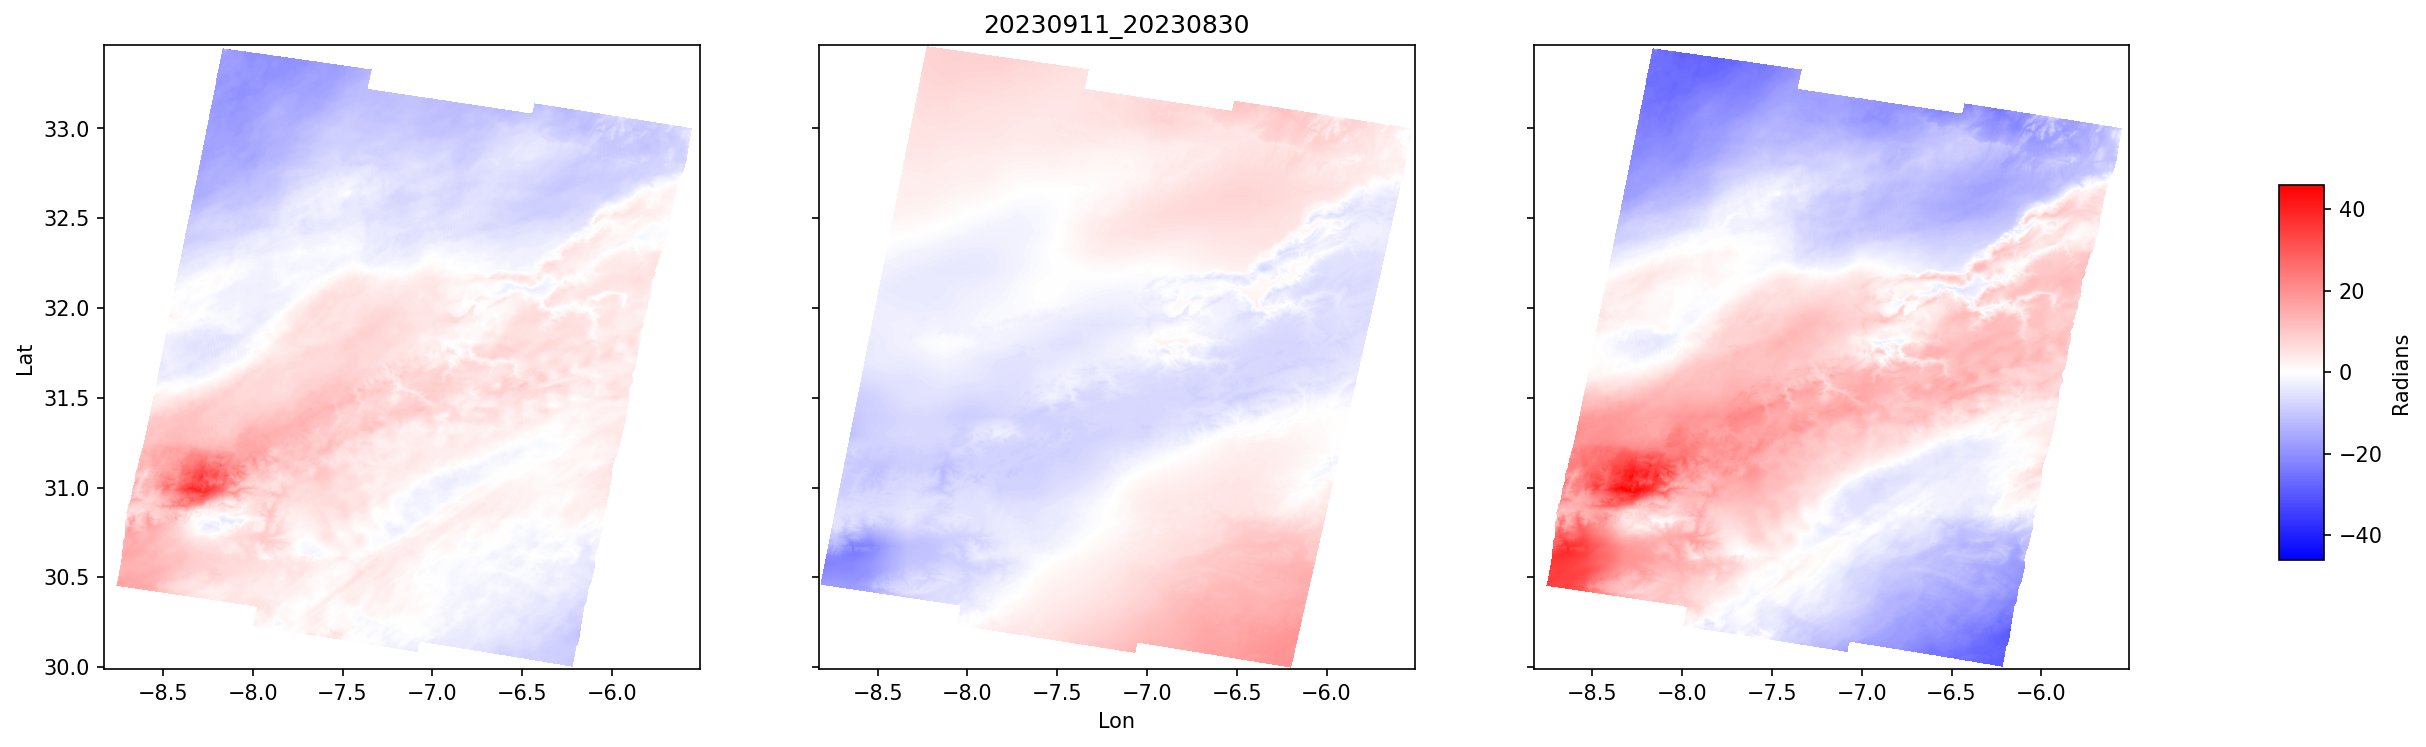

In [7]:
fig, axs = plt.subplots(1, 3, 
                        dpi=150, 
                        sharey=True, 
                        sharex=True, 
                        figsize=(20, 10))
cmap='bwr'

v = max(np.nanmax(np.abs(unw)), np.nanmax(np.abs(tropo)))
out = show(unw, transform=p['transform'], ax=axs[0], vmin=-v, vmax=v, cmap=cmap)
axs[0].set_ylabel('Lat')


show(tropo, transform=p['transform'], ax=axs[1], vmin=-v, vmax=v, cmap=cmap)
axs[1].set_xlabel('Lon')

show(unw - tropo, transform=p['transform'], ax=axs[2], vmin=-v, vmax=v, cmap=cmap)

im = out.get_images()[0]
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.36, 0.015, 0.25])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('Radians')
axs[1].set_title(unw_vrts[prod_index].stem)